# import keras, initialize conv_base

In [1]:
import keras
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
                  

C:\Users\Dennis1\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# feature extraction from conv base

In [32]:
import os
import numpy as np
import random
import glob
#from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
random.shuffle(glob.glob("c:/Users/Dennis1/ki/testse/train/*"))
random.shuffle(glob.glob("c:/Users/Dennis1/ki/testse/validate/*"))
random.shuffle(glob.glob("c:/Users/Dennis1/ki/testse/test/*"))
base_dir = ("c:/Users/Dennis1/ki/testse")
train_dir = ("c:/Users/Dennis1/ki/testse/train")
validation_dir = ("c:/Users/Dennis1/ki/testse/validate")
test_dir = ("c:/Users/Dennis1/ki/testse/test")
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 4000)
validation_features, validation_labels = extract_features(validation_dir, 1200)




Found 4200 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.


# reshape to fit dense layers

In [34]:

train_features = np.reshape(train_features, (4000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1200, 4 * 4 * 512))




# new classifier + fit model

In [3]:
from keras import models
from keras import layers
from keras import optimizers


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer="rmsprop",
              #binary_crossentropy 2 Klassen
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=9,
                    batch_size=200,
                    validation_data=(validation_features, validation_labels))

NameError: name 'train_features' is not defined

# new model

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 771       
Total params: 2,098,179
Trainable params: 2,098,179
Non-trainable params: 0
_________________________________________________________________


# graphic solution

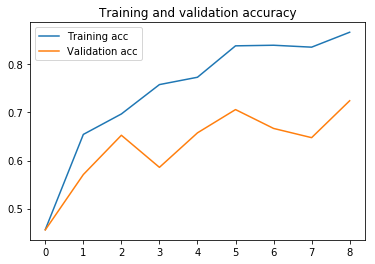

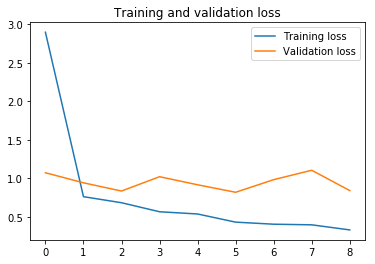

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("Training Acc-"+str((int(time.time())))+".png", dpi=300, bbox_inches='tight')
plt.figure()

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("Training Loss-"+str((int(time.time())))+".png", dpi=300, bbox_inches='tight')
plt.show()

# save model

In [4]:
from keras.models import save_model

model.save(".h5")